# 모델링 - ML
## ML model
- SVM, RandomForest, Gradient Boosting, Light GBM, XGBoost
- 5-fold cross validation
- Grid Search  

## Data
- 274 rows * 8 columns
- train:test = 8:2

In [10]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Novel Data Load

In [12]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/novel_final.csv', index_col='이름')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,장르,총합 별점,관심수,평균 조회수,평균 업로드 간격,평균 공백 제거 글자수,평균 댓글 수,Target
이름,,,,,,,,
임신 계략,로맨스,9.98,2179,24000.0,1.50,3619.0,3.8,1
제국의 하인,로맨스,9.99,2135,22000.0,0.25,4637.8,10.0,1
"첫사랑, 첫이별, 첫아이",로맨스,9.99,1549,14000.0,4.00,3924.0,11.2,1
못난이 아내,로맨스,9.98,1136,9799.6,1.25,3333.0,0.8,1
남편의 체온,로맨스,9.97,1482,20000.0,1.00,5098.8,9.6,1
...,...,...,...,...,...,...,...,...
바뀌어버린 세계,라이트노벨,9.94,11,535.0,1.50,2385.6,0.8,0
희비록,라이트노벨,9.99,6,73.2,1.75,1198.6,1.4,0
생명과 이름:『호명 / 呼名』,라이트노벨,7.71,3,45.8,0.50,3052.4,0.4,0


In [13]:
data = pd.get_dummies(data)  # 장르 -> 더미화
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 임신 계략 to 당신도 용사가 될 수 있습니다! 아마도?
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   총합 별점         274 non-null    float64
 1   관심수           274 non-null    int64  
 2   평균 조회수        274 non-null    float64
 3   평균 업로드 간격     274 non-null    float64
 4   평균 공백 제거 글자수  274 non-null    float64
 5   평균 댓글 수       274 non-null    float64
 6   Target        274 non-null    int64  
 7   장르_라이트노벨      274 non-null    uint8  
 8   장르_로맨스        274 non-null    uint8  
 9   장르_로판         274 non-null    uint8  
 10  장르_무협         274 non-null    uint8  
 11  장르_미스터리       274 non-null    uint8  
 12  장르_판타지        274 non-null    uint8  
 13  장르_현판         274 non-null    uint8  
dtypes: float64(5), int64(2), uint8(7)
memory usage: 19.0+ KB


In [14]:
x = data[data.columns.difference(['Target'])]
y = data['Target']

In [15]:
# 학습 데이터와 테스트 데이터 8:2 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=24)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

219 55
219 55


In [ ]:
print(X_train.장르_라이트노벨.value_counts())
print(X_train.장르_로맨스.value_counts())
print(X_train.장르_로판.value_counts())
print(X_train.장르_무협.value_counts())
print(X_train.장르_미스터리.value_counts())
print(X_train.장르_판타지.value_counts())
print(X_train.장르_현판.value_counts())

0    192
1     27
Name: 장르_라이트노벨, dtype: int64
0    189
1     30
Name: 장르_로맨스, dtype: int64
0    189
1     30
Name: 장르_로판, dtype: int64
0    189
1     30
Name: 장르_무협, dtype: int64
0    187
1     32
Name: 장르_미스터리, dtype: int64
0    182
1     37
Name: 장르_판타지, dtype: int64
0    186
1     33
Name: 장르_현판, dtype: int64


In [ ]:
print(X_test.장르_라이트노벨.value_counts())
print(X_test.장르_로맨스.value_counts())
print(X_test.장르_로판.value_counts())
print(X_test.장르_무협.value_counts())
print(X_test.장르_미스터리.value_counts())
print(X_test.장르_판타지.value_counts())
print(X_test.장르_현판.value_counts())

0    45
1    10
Name: 장르_라이트노벨, dtype: int64
0    45
1    10
Name: 장르_로맨스, dtype: int64
0    45
1    10
Name: 장르_로판, dtype: int64
0    46
1     9
Name: 장르_무협, dtype: int64
0    48
1     7
Name: 장르_미스터리, dtype: int64
0    53
1     2
Name: 장르_판타지, dtype: int64
0    48
1     7
Name: 장르_현판, dtype: int64


In [16]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5)

### SVM

#### 5-fold

In [ ]:
from sklearn import svm

svm_clf = svm.SVC(kernel = 'linear', random_state=42)
svm_clf.fit(X_train, y_train)
score = cross_val_score(svm_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.81818182 0.79545455 0.77272727 0.90909091 0.6744186 ]


In [ ]:
round(np.mean(score) * 100, 2)

79.4

In [ ]:
pred = svm_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.81      0.81      0.81        27

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.82      0.82      0.82        55



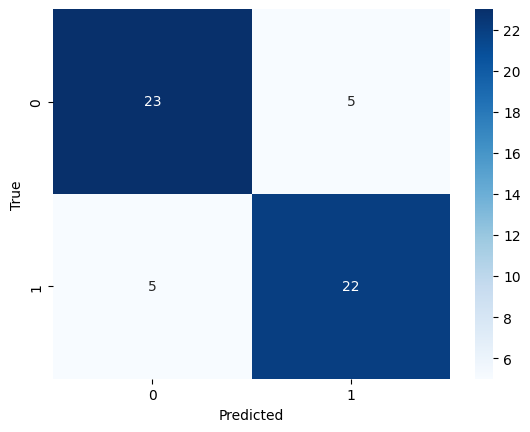

In [ ]:
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### grid search + 5-fold

In [18]:
# SVM Classifier 객체 생성
svm_clf = svm.SVC(kernel = 'linear', random_state=42)

# 탐색할 매개변수 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001]
}

# GridSearchCV를 사용하여 최적의 매개변수 탐색
grid_search_svm = GridSearchCV(svm_clf, param_grid=param_grid, cv=k_fold, scoring='accuracy', n_jobs=1)
grid_search_svm.fit(X_train, y_train)

# 최적의 매개변수와 최고 성능 출력
print("Best Parameters: ", grid_search_svm.best_params_)
print("Best Score: ", grid_search_svm.best_score_)

Best Parameters:  {'C': 1, 'gamma': 0.1}
Best Score:  0.7939746300211417


In [19]:
pred_svm = grid_search_svm.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_svm))
accuracy = accuracy_score(y_test, pred_svm)
print(f'Mean accuracy score: {accuracy:.3}')

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.81      0.81      0.81        27

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.82      0.82      0.82        55

Mean accuracy score: 0.818


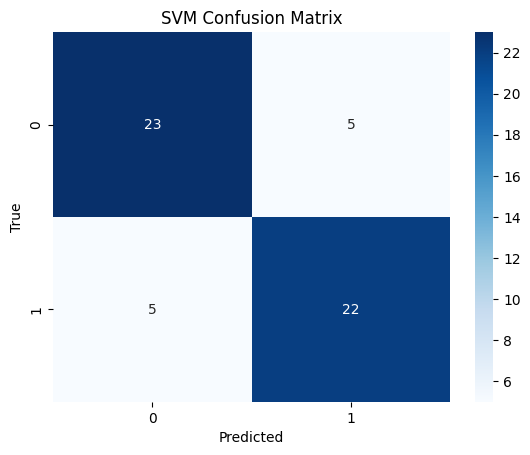

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, pred_svm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# 예측이 틀린 결과의 인덱스 가져오기
incorrect_indices = np.where(pred_svm != y_test)[0]

# 예측이 틀린 데이터의 내용 출력
print("Incorrect Prediction:")
for index in incorrect_indices:
    print("<Input Data>")
    print(X_test.iloc[index, :])
    print("True Label:", y_test[index])
    print("Predicted Label:", pred_svm[index])
    print("-------------------")

Incorrect Prediction:
<Input Data>
관심수                1.0
장르_라이트노벨           1.0
장르_로맨스             0.0
장르_로판              0.0
장르_무협              0.0
장르_미스터리            0.0
장르_판타지             0.0
장르_현판              0.0
총합 별점             10.0
평균 공백 제거 글자수    2514.2
평균 댓글 수            0.2
평균 업로드 간격          4.0
평균 조회수            63.4
Name: 삶의 절망에 빠진 60대 엄마에 딸이, dtype: float64
True Label: 1
Predicted Label: 0
-------------------
<Input Data>
관심수              344.00
장르_라이트노벨           0.00
장르_로맨스             1.00
장르_로판              0.00
장르_무협              0.00
장르_미스터리            0.00
장르_판타지             0.00
장르_현판              0.00
총합 별점             10.00
평균 공백 제거 글자수    4158.00
평균 댓글 수            3.80
평균 업로드 간격          4.25
평균 조회수          3117.00
Name: 나의 친구, 다정한 완벽주의자, dtype: float64
True Label: 0
Predicted Label: 1
-------------------
<Input Data>
관심수               10.0
장르_라이트노벨           1.0
장르_로맨스             0.0
장르_로판              0.0
장르_무협              0.0
장르_미스터리            0.0
장르

In [ ]:
# 예측이 틀린 데이터를 데이터프레임으로 저장
incorrect_svm = X_test.iloc[incorrect_indices, :]
incorrect_svm['True Label'] = y_test[incorrect_indices]
incorrect_svm['Predicted Label'] = pred_svm[incorrect_indices]

# 데이터프레임 출력
print("Incorrect Prediction:")
incorrect_svm

Incorrect Prediction:


<ipython-input-80-b5b7824d3f5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_svm['True Label'] = y_test[incorrect_indices]
<ipython-input-80-b5b7824d3f5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_svm['Predicted Label'] = pred_svm[incorrect_indices]


,관심수,장르_라이트노벨,장르_로맨스,장르_로판,장르_무협,장르_미스터리,장르_판타지,장르_현판,총합 별점,평균 공백 제거 글자수,평균 댓글 수,평균 업로드 간격,평균 조회수,True Label,Predicted Label
이름,,,,,,,,,,,,,,,
삶의 절망에 빠진 60대 엄마에 딸이,1,1,0,0,0,0,0,0,10.00,2514.2,0.2,4.00,63.4,1,0
"나의 친구, 다정한 완벽주의자",344,0,1,0,0,0,0,0,10.00,4158.0,3.8,4.25,3117.0,0,1
마녀가 제 여동생이라는데요?,10,1,0,0,0,0,0,0,10.00,2492.2,0.8,22.00,201.2,1,0
이번 생은 내가 떠나겠다,361,0,0,1,0,0,0,0,10.00,4678.4,0.8,1.50,9383.4,0,1
당신 아이 데려가세요,11,1,0,0,0,0,0,0,10.00,4531.8,0.4,0.00,276.2,0,1
대통령과 여왕,46,0,0,0,0,1,0,0,10.00,3486.2,0.4,20.75,660.6,1,0
흔한 이야기,12,0,0,0,0,1,0,0,10.00,4222.2,0.0,3.75,208.6,1,0
악명 높기로 악명 높은 자,140,1,0,0,0,0,0,0,9.43,2847.6,4.0,0.75,2170.4,0,1
성검학원의 듀라한,3,1,0,0,0,0,0,0,0.00,4216.4,0.0,0.25,14.8,1,0


### RandomForest

#### 5-fold

In [ ]:
rand_clf = RandomForestClassifier(n_estimators=13, random_state=42)
rand_clf.fit(X_train, y_train)
score = cross_val_score(rand_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.81818182 0.84090909 0.81818182 0.84090909 0.74418605]


In [ ]:
round(np.mean(score) * 100, 2)

81.25

In [ ]:
pred = rand_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.83      0.89      0.86        27

    accuracy                           0.85        55
   macro avg       0.86      0.86      0.85        55
weighted avg       0.86      0.85      0.85        55



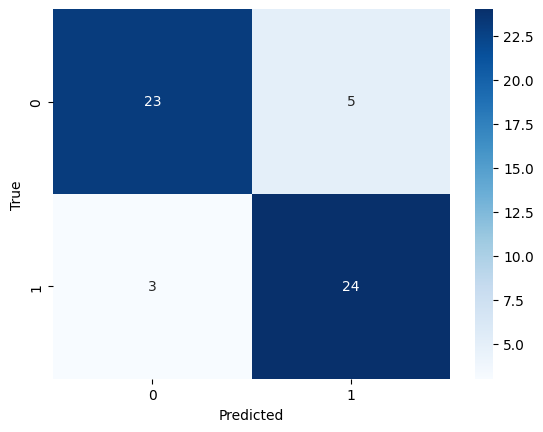

In [ ]:
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### grid search + 5-fold

In [ ]:
# Random Forest Classifier 객체 생성
rand_clf = RandomForestClassifier(random_state=42)

# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_estimators': [10, 50, 100],  # 트리의 개수
    'max_depth': [None, 5, 10],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10]  # 노드를 분할하기 위한 최소 샘플 수
}

# GridSearchCV를 사용하여 최적의 매개변수 탐색
grid_search_rand = GridSearchCV(rand_clf, param_grid=param_grid, cv=k_fold, scoring='accuracy', n_jobs=1)
grid_search_rand.fit(X_train, y_train)

# 최적의 매개변수와 최고 성능 출력
print("Best Parameters: ", grid_search_rand.best_params_)
print("Best Score: ", grid_search_rand.best_score_)

Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.8215644820295983


In [ ]:
pred_rand = grid_search_rand.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_rand))
accuracy = accuracy_score(y_test, pred_rand)
print(f'Mean accuracy score: {accuracy:.3}')

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.86      0.89      0.87        27

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55

Mean accuracy score: 0.873


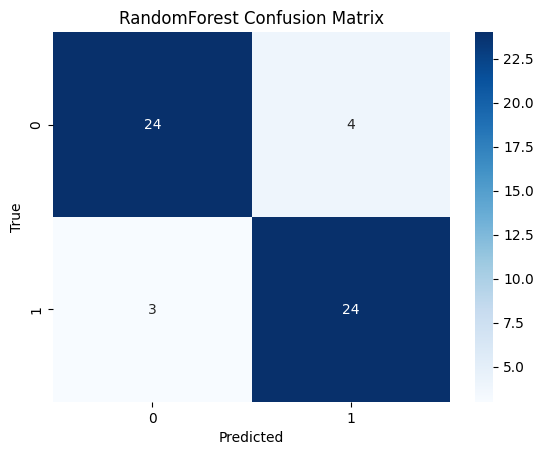

In [ ]:
cm = confusion_matrix(y_test, pred_rand)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# 예측이 틀린 결과의 인덱스 가져오기
incorrect_indices = np.where(pred_rand != y_test)[0]

# 예측이 틀린 데이터의 내용 출력
print("Incorrect Prediction:")
for index in incorrect_indices:
    print("<Input Data>")
    print(X_test.iloc[index, :])
    print("True Label:", y_test[index])
    print("Predicted Label:", pred_rand[index])
    print("-------------------")

Incorrect Prediction:
<Input Data>
관심수                1.0
장르_라이트노벨           1.0
장르_로맨스             0.0
장르_로판              0.0
장르_무협              0.0
장르_미스터리            0.0
장르_판타지             0.0
장르_현판              0.0
총합 별점             10.0
평균 공백 제거 글자수    2514.2
평균 댓글 수            0.2
평균 업로드 간격          4.0
평균 조회수            63.4
Name: 삶의 절망에 빠진 60대 엄마에 딸이, dtype: float64
True Label: 1
Predicted Label: 0
-------------------
<Input Data>
관심수              344.00
장르_라이트노벨           0.00
장르_로맨스             1.00
장르_로판              0.00
장르_무협              0.00
장르_미스터리            0.00
장르_판타지             0.00
장르_현판              0.00
총합 별점             10.00
평균 공백 제거 글자수    4158.00
평균 댓글 수            3.80
평균 업로드 간격          4.25
평균 조회수          3117.00
Name: 나의 친구, 다정한 완벽주의자, dtype: float64
True Label: 0
Predicted Label: 1
-------------------
<Input Data>
관심수              361.0
장르_라이트노벨           0.0
장르_로맨스             0.0
장르_로판              1.0
장르_무협              0.0
장르_미스터리            0.0
장르

In [ ]:
# 예측이 틀린 데이터를 데이터프레임으로 저장
incorrect_rand = X_test.iloc[incorrect_indices, :]
incorrect_rand['True Label'] = y_test[incorrect_indices]
incorrect_rand['Predicted Label'] = pred_svm[incorrect_indices]

# 데이터프레임 출력
print("Incorrect Prediction:")
incorrect_rand

Incorrect Prediction:


<ipython-input-82-1067a9393fe5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_rand['True Label'] = y_test[incorrect_indices]
<ipython-input-82-1067a9393fe5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_rand['Predicted Label'] = pred_svm[incorrect_indices]


,관심수,장르_라이트노벨,장르_로맨스,장르_로판,장르_무협,장르_미스터리,장르_판타지,장르_현판,총합 별점,평균 공백 제거 글자수,평균 댓글 수,평균 업로드 간격,평균 조회수,True Label,Predicted Label
이름,,,,,,,,,,,,,,,
삶의 절망에 빠진 60대 엄마에 딸이,1,1,0,0,0,0,0,0,10.00,2514.2,0.2,4.00,63.4,1,0
"나의 친구, 다정한 완벽주의자",344,0,1,0,0,0,0,0,10.00,4158.0,3.8,4.25,3117.0,0,1
이번 생은 내가 떠나겠다,361,0,0,1,0,0,0,0,10.00,4678.4,0.8,1.50,9383.4,0,1
당신 아이 데려가세요,11,1,0,0,0,0,0,0,10.00,4531.8,0.4,0.00,276.2,0,1
채굴을 시작합니다.,21,0,0,0,0,0,0,1,9.59,1862.4,0.0,0.00,381.2,1,1
악명 높기로 악명 높은 자,140,1,0,0,0,0,0,0,9.43,2847.6,4.0,0.75,2170.4,0,1
성검학원의 듀라한,3,1,0,0,0,0,0,0,0.00,4216.4,0.0,0.25,14.8,1,0


### Gradient Boosting

#### 5-fold

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
score = cross_val_score(gb_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.79545455 0.77272727 0.79545455 0.86363636 0.81395349]


In [ ]:
round(np.mean(score) * 100, 2)

80.82

In [ ]:
pred = gb_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.83      0.93      0.88        27

    accuracy                           0.87        55
   macro avg       0.88      0.87      0.87        55
weighted avg       0.88      0.87      0.87        55



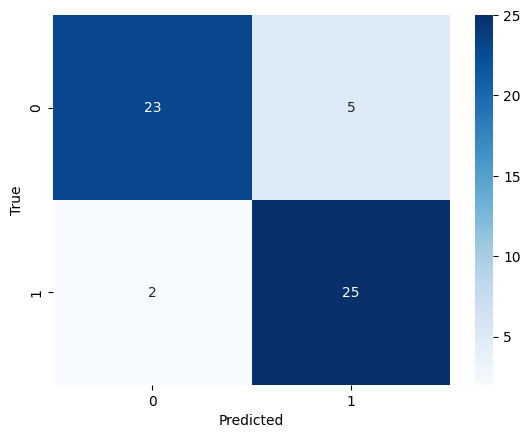

In [ ]:
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### grid search + 5-fold

In [ ]:
# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'learning_rate': [0.1, 0.05, 0.01],  # 학습률
    'max_depth': [3, 5, 7]  # 트리의 최대 깊이
}

# GridSearchCV를 사용하여 최적의 매개변수 탐색
grid_search_gb = GridSearchCV(gb_clf, param_grid=param_grid, cv=k_fold, scoring='accuracy', n_jobs=1)
grid_search_gb.fit(X_train, y_train)

# 최적의 매개변수와 최고 성능 출력
print("Best Parameters: ", grid_search_gb.best_params_)
print("Best Score: ", grid_search_gb.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score:  0.8447145877378436


In [ ]:
pred_gb = grid_search_gb.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_gb))
accuracy = accuracy_score(y_test, pred_gb)
print(f'Mean accuracy score: {accuracy:.3}')

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.83      0.93      0.88        27

    accuracy                           0.87        55
   macro avg       0.88      0.87      0.87        55
weighted avg       0.88      0.87      0.87        55

Mean accuracy score: 0.873


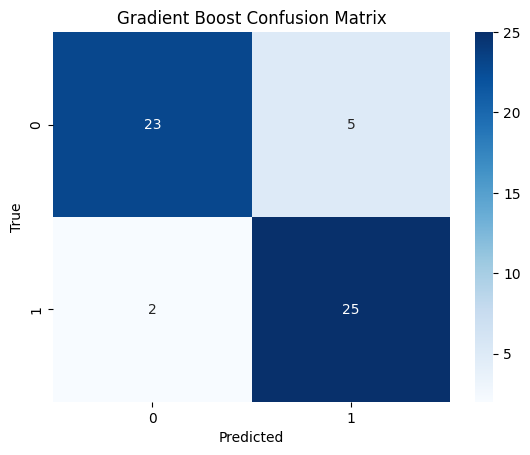

In [ ]:
cm = confusion_matrix(y_test, pred_gb)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Gradient Boost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# 예측이 틀린 결과의 인덱스 가져오기
incorrect_indices = np.where(pred_gb != y_test)[0]

# 예측이 틀린 데이터의 내용 출력
print("Incorrect Prediction:")
for index in incorrect_indices:
    print("<Input Data>")
    print(X_test.iloc[index, :])
    print("True Label:", y_test[index])
    print("Predicted Label:", pred_gb[index])
    print("-------------------")

Incorrect Prediction:
<Input Data>
관심수                1.0
장르_라이트노벨           1.0
장르_로맨스             0.0
장르_로판              0.0
장르_무협              0.0
장르_미스터리            0.0
장르_판타지             0.0
장르_현판              0.0
총합 별점             10.0
평균 공백 제거 글자수    2514.2
평균 댓글 수            0.2
평균 업로드 간격          4.0
평균 조회수            63.4
Name: 삶의 절망에 빠진 60대 엄마에 딸이, dtype: float64
True Label: 1
Predicted Label: 0
-------------------
<Input Data>
관심수              344.00
장르_라이트노벨           0.00
장르_로맨스             1.00
장르_로판              0.00
장르_무협              0.00
장르_미스터리            0.00
장르_판타지             0.00
장르_현판              0.00
총합 별점             10.00
평균 공백 제거 글자수    4158.00
평균 댓글 수            3.80
평균 업로드 간격          4.25
평균 조회수          3117.00
Name: 나의 친구, 다정한 완벽주의자, dtype: float64
True Label: 0
Predicted Label: 1
-------------------
<Input Data>
관심수              361.0
장르_라이트노벨           0.0
장르_로맨스             0.0
장르_로판              1.0
장르_무협              0.0
장르_미스터리            0.0
장르

In [ ]:
# 예측이 틀린 데이터를 데이터프레임으로 저장
incorrect_gb = X_test.iloc[incorrect_indices, :]
incorrect_gb['True Label'] = y_test[incorrect_indices]
incorrect_gb['Predicted Label'] = pred_svm[incorrect_indices]

# 데이터프레임 출력
print("Incorrect Prediction:")
incorrect_gb

Incorrect Prediction:


<ipython-input-84-71a8214caf4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_gb['True Label'] = y_test[incorrect_indices]
<ipython-input-84-71a8214caf4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_gb['Predicted Label'] = pred_svm[incorrect_indices]


,관심수,장르_라이트노벨,장르_로맨스,장르_로판,장르_무협,장르_미스터리,장르_판타지,장르_현판,총합 별점,평균 공백 제거 글자수,평균 댓글 수,평균 업로드 간격,평균 조회수,True Label,Predicted Label
이름,,,,,,,,,,,,,,,
삶의 절망에 빠진 60대 엄마에 딸이,1,1,0,0,0,0,0,0,10.00,2514.2,0.2,4.00,63.4,1,0
"나의 친구, 다정한 완벽주의자",344,0,1,0,0,0,0,0,10.00,4158.0,3.8,4.25,3117.0,0,1
이번 생은 내가 떠나겠다,361,0,0,1,0,0,0,0,10.00,4678.4,0.8,1.50,9383.4,0,1
당신 아이 데려가세요,11,1,0,0,0,0,0,0,10.00,4531.8,0.4,0.00,276.2,0,1
악명 높기로 악명 높은 자,140,1,0,0,0,0,0,0,9.43,2847.6,4.0,0.75,2170.4,0,1
성검학원의 듀라한,3,1,0,0,0,0,0,0,0.00,4216.4,0.0,0.25,14.8,1,0
바뀌어버린 세계,11,1,0,0,0,0,0,0,9.94,2385.6,0.8,1.50,535.0,0,1


### Light GBM

#### 5-fold

In [21]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)
score = cross_val_score(lgb_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.75       0.79545455 0.75       0.86363636 0.74418605]


In [ ]:
round(np.mean(score) * 100, 2)

78.07

In [ ]:
pred = lgb_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.90      0.96      0.93        27

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55



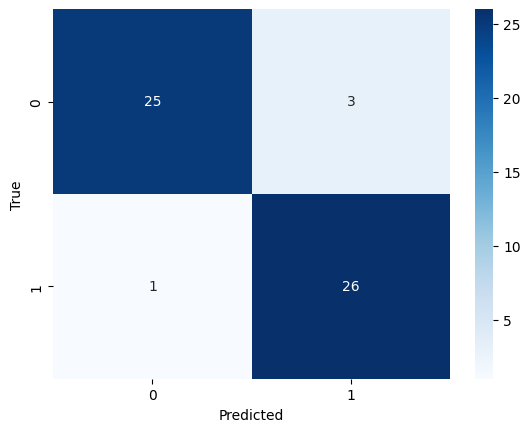

In [ ]:
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### grid search + 5-fold

In [24]:
from lightgbm import LGBMClassifier

# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'learning_rate': [0.1, 0.05, 0.01],  # 학습률
    'max_depth': [3, 5, 7],  # 트리의 최대 깊이
    'num_leaves': [31, 61, 101]  # 트리의 최대 리프 개수
}

# GridSearchCV를 사용하여 최적의 매개변수 탐색
lgb_clf = LGBMClassifier(random_state=42)
grid_search_lgb = GridSearchCV(lgb_clf, param_grid=param_grid, cv=k_fold, scoring='accuracy', n_jobs=1)
grid_search_lgb.fit(X_train, y_train)

# 최적의 매개변수와 최고 성능 출력
print("Best Parameters: ", grid_search_lgb.best_params_)
print("Best Score: ", grid_search_lgb.best_score_)

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 31}
Best Score:  0.8034883720930232


In [25]:
pred_lgb = grid_search_lgb.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_lgb))
accuracy = accuracy_score(y_test, pred_lgb)
print(f'Mean accuracy score: {accuracy:.3}')

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.90      0.96      0.93        27

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55

Mean accuracy score: 0.927


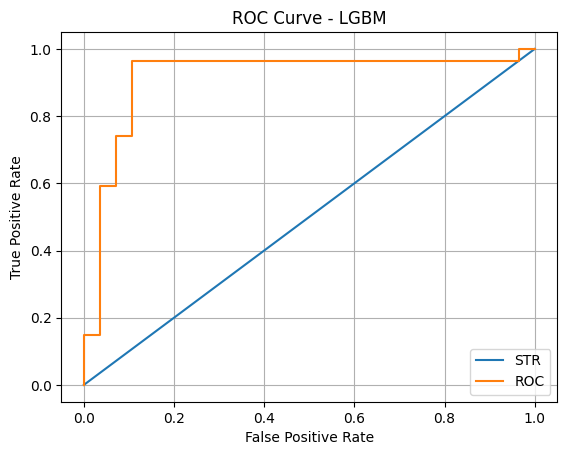

In [27]:
from sklearn.metrics import roc_curve, auc

pred_positive_label = grid_search_lgb.best_estimator_.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_positive_label)
precisions, recalls, thresholds = roc_curve(y_test, pred_positive_label)
roc_auc = auc(fprs, tprs)

plt.figure()
# 대각선
plt.plot([0,1],[0,1],label='STR')

# ROC
plt.plot(fprs,tprs,label='ROC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LGBM')
plt.legend()
plt.grid()
plt.show()

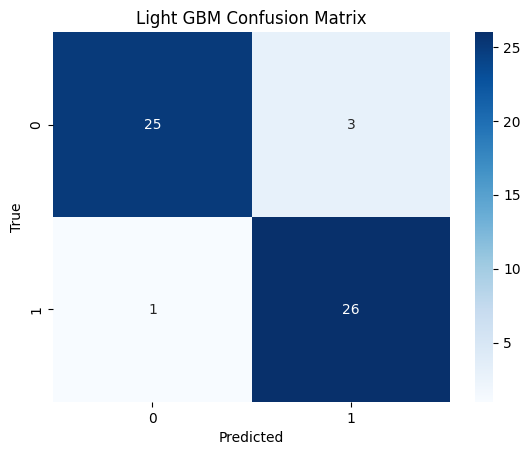

In [ ]:
cm = confusion_matrix(y_test, pred_lgb)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Light GBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# 예측이 틀린 결과의 인덱스 가져오기
incorrect_indices = np.where(pred_lgb != y_test)[0]

# 예측이 틀린 데이터의 내용 출력
print("Incorrect Prediction:")
for index in incorrect_indices:
    print("<Input Data>")
    print(X_test.iloc[index, :])
    print("True Label:", y_test[index])
    print("Predicted Label:", pred_lgb[index])
    print("-------------------")

Incorrect Prediction:
<Input Data>
관심수              361.0
장르_라이트노벨           0.0
장르_로맨스             0.0
장르_로판              1.0
장르_무협              0.0
장르_미스터리            0.0
장르_판타지             0.0
장르_현판              0.0
총합 별점             10.0
평균 공백 제거 글자수    4678.4
평균 댓글 수            0.8
평균 업로드 간격          1.5
평균 조회수          9383.4
Name: 이번 생은 내가 떠나겠다, dtype: float64
True Label: 0
Predicted Label: 1
-------------------
<Input Data>
관심수               11.0
장르_라이트노벨           1.0
장르_로맨스             0.0
장르_로판              0.0
장르_무협              0.0
장르_미스터리            0.0
장르_판타지             0.0
장르_현판              0.0
총합 별점             10.0
평균 공백 제거 글자수    4531.8
평균 댓글 수            0.4
평균 업로드 간격          0.0
평균 조회수           276.2
Name: 당신 아이 데려가세요, dtype: float64
True Label: 0
Predicted Label: 1
-------------------
<Input Data>
관심수              140.00
장르_라이트노벨           1.00
장르_로맨스             0.00
장르_로판              0.00
장르_무협              0.00
장르_미스터리            0.00
장르_판타지             0.

In [ ]:
# 예측이 틀린 데이터를 데이터프레임으로 저장
incorrect_lgb = X_test.iloc[incorrect_indices, :]
incorrect_lgb['True Label'] = y_test[incorrect_indices]
incorrect_lgb['Predicted Label'] = pred_svm[incorrect_indices]

# 데이터프레임 출력
print("Incorrect Prediction:")
incorrect_lgb

Incorrect Prediction:


<ipython-input-86-99dbac6b0ee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_lgb['True Label'] = y_test[incorrect_indices]
<ipython-input-86-99dbac6b0ee2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_lgb['Predicted Label'] = pred_svm[incorrect_indices]


,관심수,장르_라이트노벨,장르_로맨스,장르_로판,장르_무협,장르_미스터리,장르_판타지,장르_현판,총합 별점,평균 공백 제거 글자수,평균 댓글 수,평균 업로드 간격,평균 조회수,True Label,Predicted Label
이름,,,,,,,,,,,,,,,
이번 생은 내가 떠나겠다,361,0,0,1,0,0,0,0,10.00,4678.4,0.8,1.50,9383.4,0,1
당신 아이 데려가세요,11,1,0,0,0,0,0,0,10.00,4531.8,0.4,0.00,276.2,0,1
악명 높기로 악명 높은 자,140,1,0,0,0,0,0,0,9.43,2847.6,4.0,0.75,2170.4,0,1
성검학원의 듀라한,3,1,0,0,0,0,0,0,0.00,4216.4,0.0,0.25,14.8,1,0


### XGBoost

#### 5-fold

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
score = cross_val_score(xgb_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.75       0.77272727 0.81818182 0.81818182 0.8372093 ]


In [ ]:
round(np.mean(score) * 100, 2)

79.93

In [ ]:
pred = xgb_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.83      0.93      0.88        27

    accuracy                           0.87        55
   macro avg       0.88      0.87      0.87        55
weighted avg       0.88      0.87      0.87        55



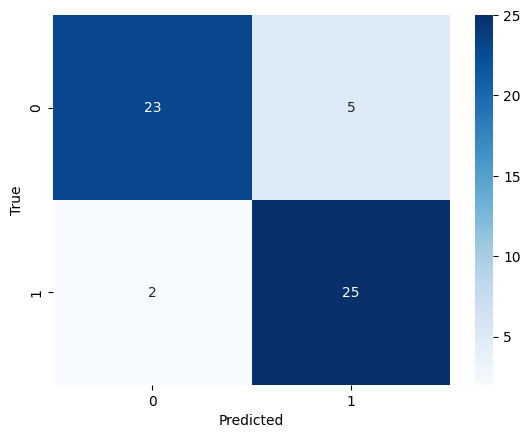

In [ ]:
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### grid search + 5-fold

In [ ]:
# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'learning_rate': [0.1, 0.05, 0.01],  # 학습률
    'max_depth': [3, 5, 7],  # 트리의 최대 깊이
    'subsample': [0.8, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.8, 1.0]  # 트리 생성에 사용되는 피처의 비율
}

# GridSearchCV를 사용하여 최적의 매개변수 탐색
grid_search_xgb = GridSearchCV(xgb_clf, param_grid=param_grid, cv=k_fold, scoring='accuracy', n_jobs=1)
grid_search_xgb.fit(X_train, y_train)

# 최적의 매개변수와 최고 성능 출력
print("Best Parameters: ", grid_search_xgb.best_params_)
print("Best Score: ", grid_search_xgb.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score:  0.8399577167019027


In [ ]:
pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_xgb))
accuracy = accuracy_score(y_test, pred_xgb)
print(f'Mean accuracy score: {accuracy:.3}')

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.86      0.93      0.89        27

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55

Mean accuracy score: 0.891


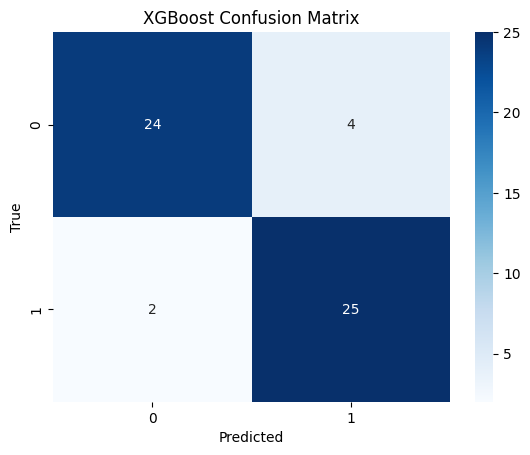

In [ ]:
cm = confusion_matrix(y_test, pred_xgb)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# 예측이 틀린 결과의 인덱스 가져오기
incorrect_indices = np.where(pred_xgb != y_test)[0]

# 예측이 틀린 데이터의 내용 출력
print("Incorrect Prediction:")
for index in incorrect_indices:
    print("<Input Data>")
    print(X_test.iloc[index, :])
    print("True Label:", y_test[index])
    print("Predicted Label:", pred_xgb[index])
    print("-------------------")

Incorrect Prediction:
<Input Data>
관심수              344.00
장르_라이트노벨           0.00
장르_로맨스             1.00
장르_로판              0.00
장르_무협              0.00
장르_미스터리            0.00
장르_판타지             0.00
장르_현판              0.00
총합 별점             10.00
평균 공백 제거 글자수    4158.00
평균 댓글 수            3.80
평균 업로드 간격          4.25
평균 조회수          3117.00
Name: 나의 친구, 다정한 완벽주의자, dtype: float64
True Label: 0
Predicted Label: 1
-------------------
<Input Data>
관심수              361.0
장르_라이트노벨           0.0
장르_로맨스             0.0
장르_로판              1.0
장르_무협              0.0
장르_미스터리            0.0
장르_판타지             0.0
장르_현판              0.0
총합 별점             10.0
평균 공백 제거 글자수    4678.4
평균 댓글 수            0.8
평균 업로드 간격          1.5
평균 조회수          9383.4
Name: 이번 생은 내가 떠나겠다, dtype: float64
True Label: 0
Predicted Label: 1
-------------------
<Input Data>
관심수               11.0
장르_라이트노벨           1.0
장르_로맨스             0.0
장르_로판              0.0
장르_무협              0.0
장르_미스터리            0.0
장르_판타지   

In [ ]:
# 예측이 틀린 데이터를 데이터프레임으로 저장
incorrect_xgb = X_test.iloc[incorrect_indices, :]
incorrect_xgb['True Label'] = y_test[incorrect_indices]
incorrect_xgb['Predicted Label'] = pred_svm[incorrect_indices]

# 데이터프레임 출력
print("Incorrect Prediction:")
incorrect_xgb

Incorrect Prediction:


<ipython-input-88-6e1ebc448fc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_xgb['True Label'] = y_test[incorrect_indices]
<ipython-input-88-6e1ebc448fc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_xgb['Predicted Label'] = pred_svm[incorrect_indices]


,관심수,장르_라이트노벨,장르_로맨스,장르_로판,장르_무협,장르_미스터리,장르_판타지,장르_현판,총합 별점,평균 공백 제거 글자수,평균 댓글 수,평균 업로드 간격,평균 조회수,True Label,Predicted Label
이름,,,,,,,,,,,,,,,
"나의 친구, 다정한 완벽주의자",344,0,1,0,0,0,0,0,10.00,4158.0,3.8,4.25,3117.0,0,1
이번 생은 내가 떠나겠다,361,0,0,1,0,0,0,0,10.00,4678.4,0.8,1.50,9383.4,0,1
당신 아이 데려가세요,11,1,0,0,0,0,0,0,10.00,4531.8,0.4,0.00,276.2,0,1
채굴을 시작합니다.,21,0,0,0,0,0,0,1,9.59,1862.4,0.0,0.00,381.2,1,1
악명 높기로 악명 높은 자,140,1,0,0,0,0,0,0,9.43,2847.6,4.0,0.75,2170.4,0,1
성검학원의 듀라한,3,1,0,0,0,0,0,0,0.00,4216.4,0.0,0.25,14.8,1,0
